<a href="https://colab.research.google.com/github/dilrabonu/python-step1/blob/main/Prediction_of_diabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Identify the diabets

In [3]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df=pd.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
616,6,117,96,0,0,28.7,0.157,30,0
241,4,91,70,32,88,33.1,0.446,22,0
153,1,153,82,42,485,40.6,0.687,23,0
181,0,119,64,18,92,34.9,0.725,23,0
274,13,106,70,0,0,34.2,0.251,52,0
750,4,136,70,0,0,31.2,1.182,22,1
363,4,146,78,0,0,38.5,0.520,67,1
745,12,100,84,33,105,30.0,0.488,46,0
704,4,110,76,20,100,28.4,0.118,27,0
180,6,87,80,0,0,23.2,0.084,32,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Check the Correlation

In [7]:
corr_matrix= df.corr().abs()
corr_matrix.style.background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df.corrwith(df["Outcome"]).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

Visualization in data

In [9]:
def half_corr_heatmap(df, title=None):
    plt.figure(figsize=(12,10))
    sns.set(font_scale=1)

    mask = np.zeros_like(df.corr())
    mask[np.tril_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(df.corr(), mask=mask, annot=True, cmap="coolwarm",linewidths=.5,fmt= '.1f')

    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

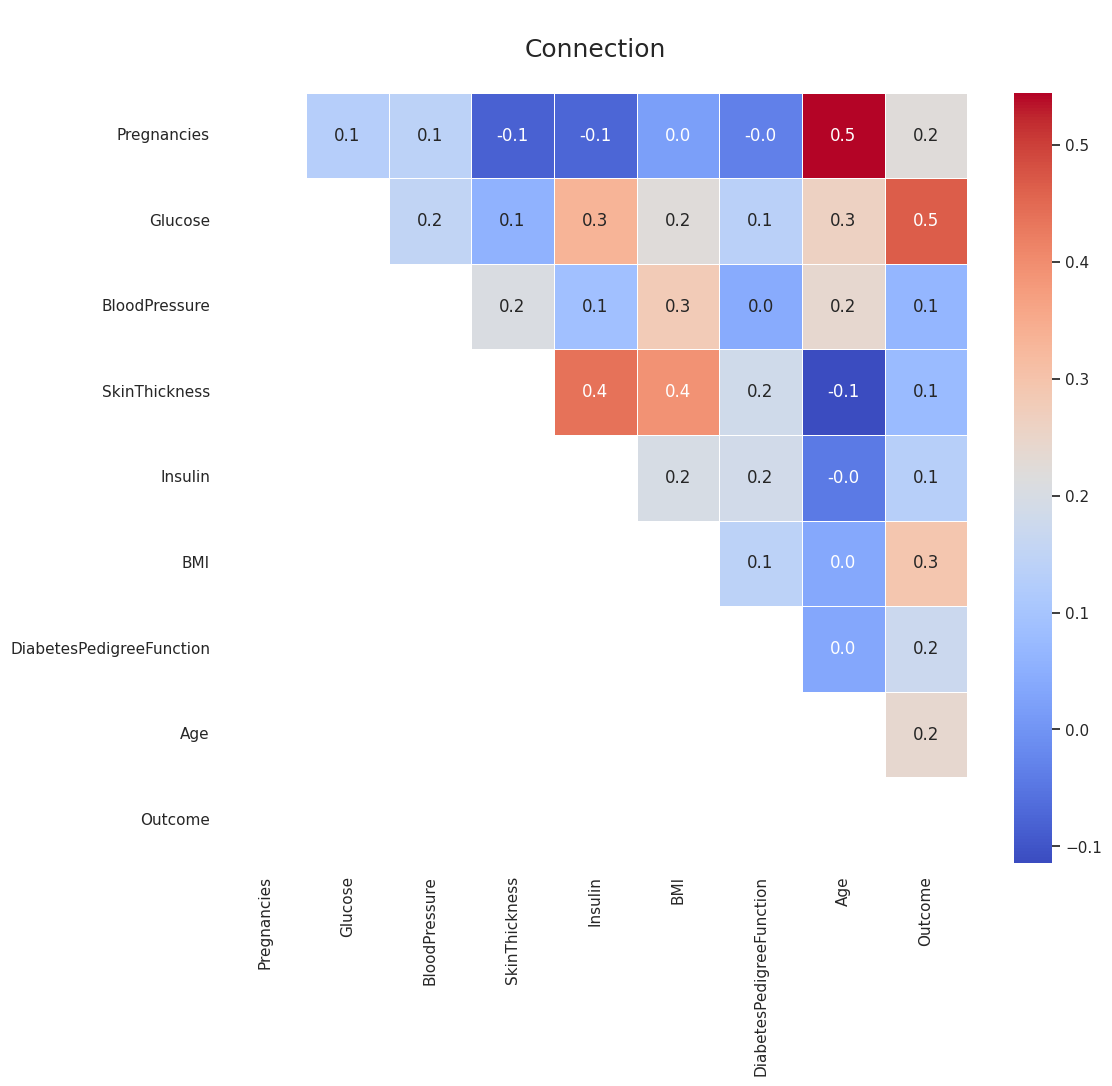

In [10]:
half_corr_heatmap(df, 'Connection')

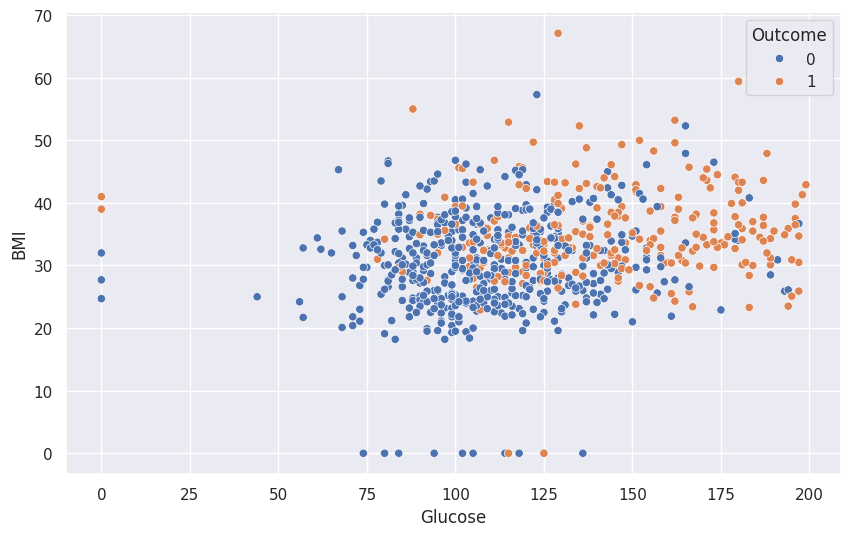

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"])
plt.show()

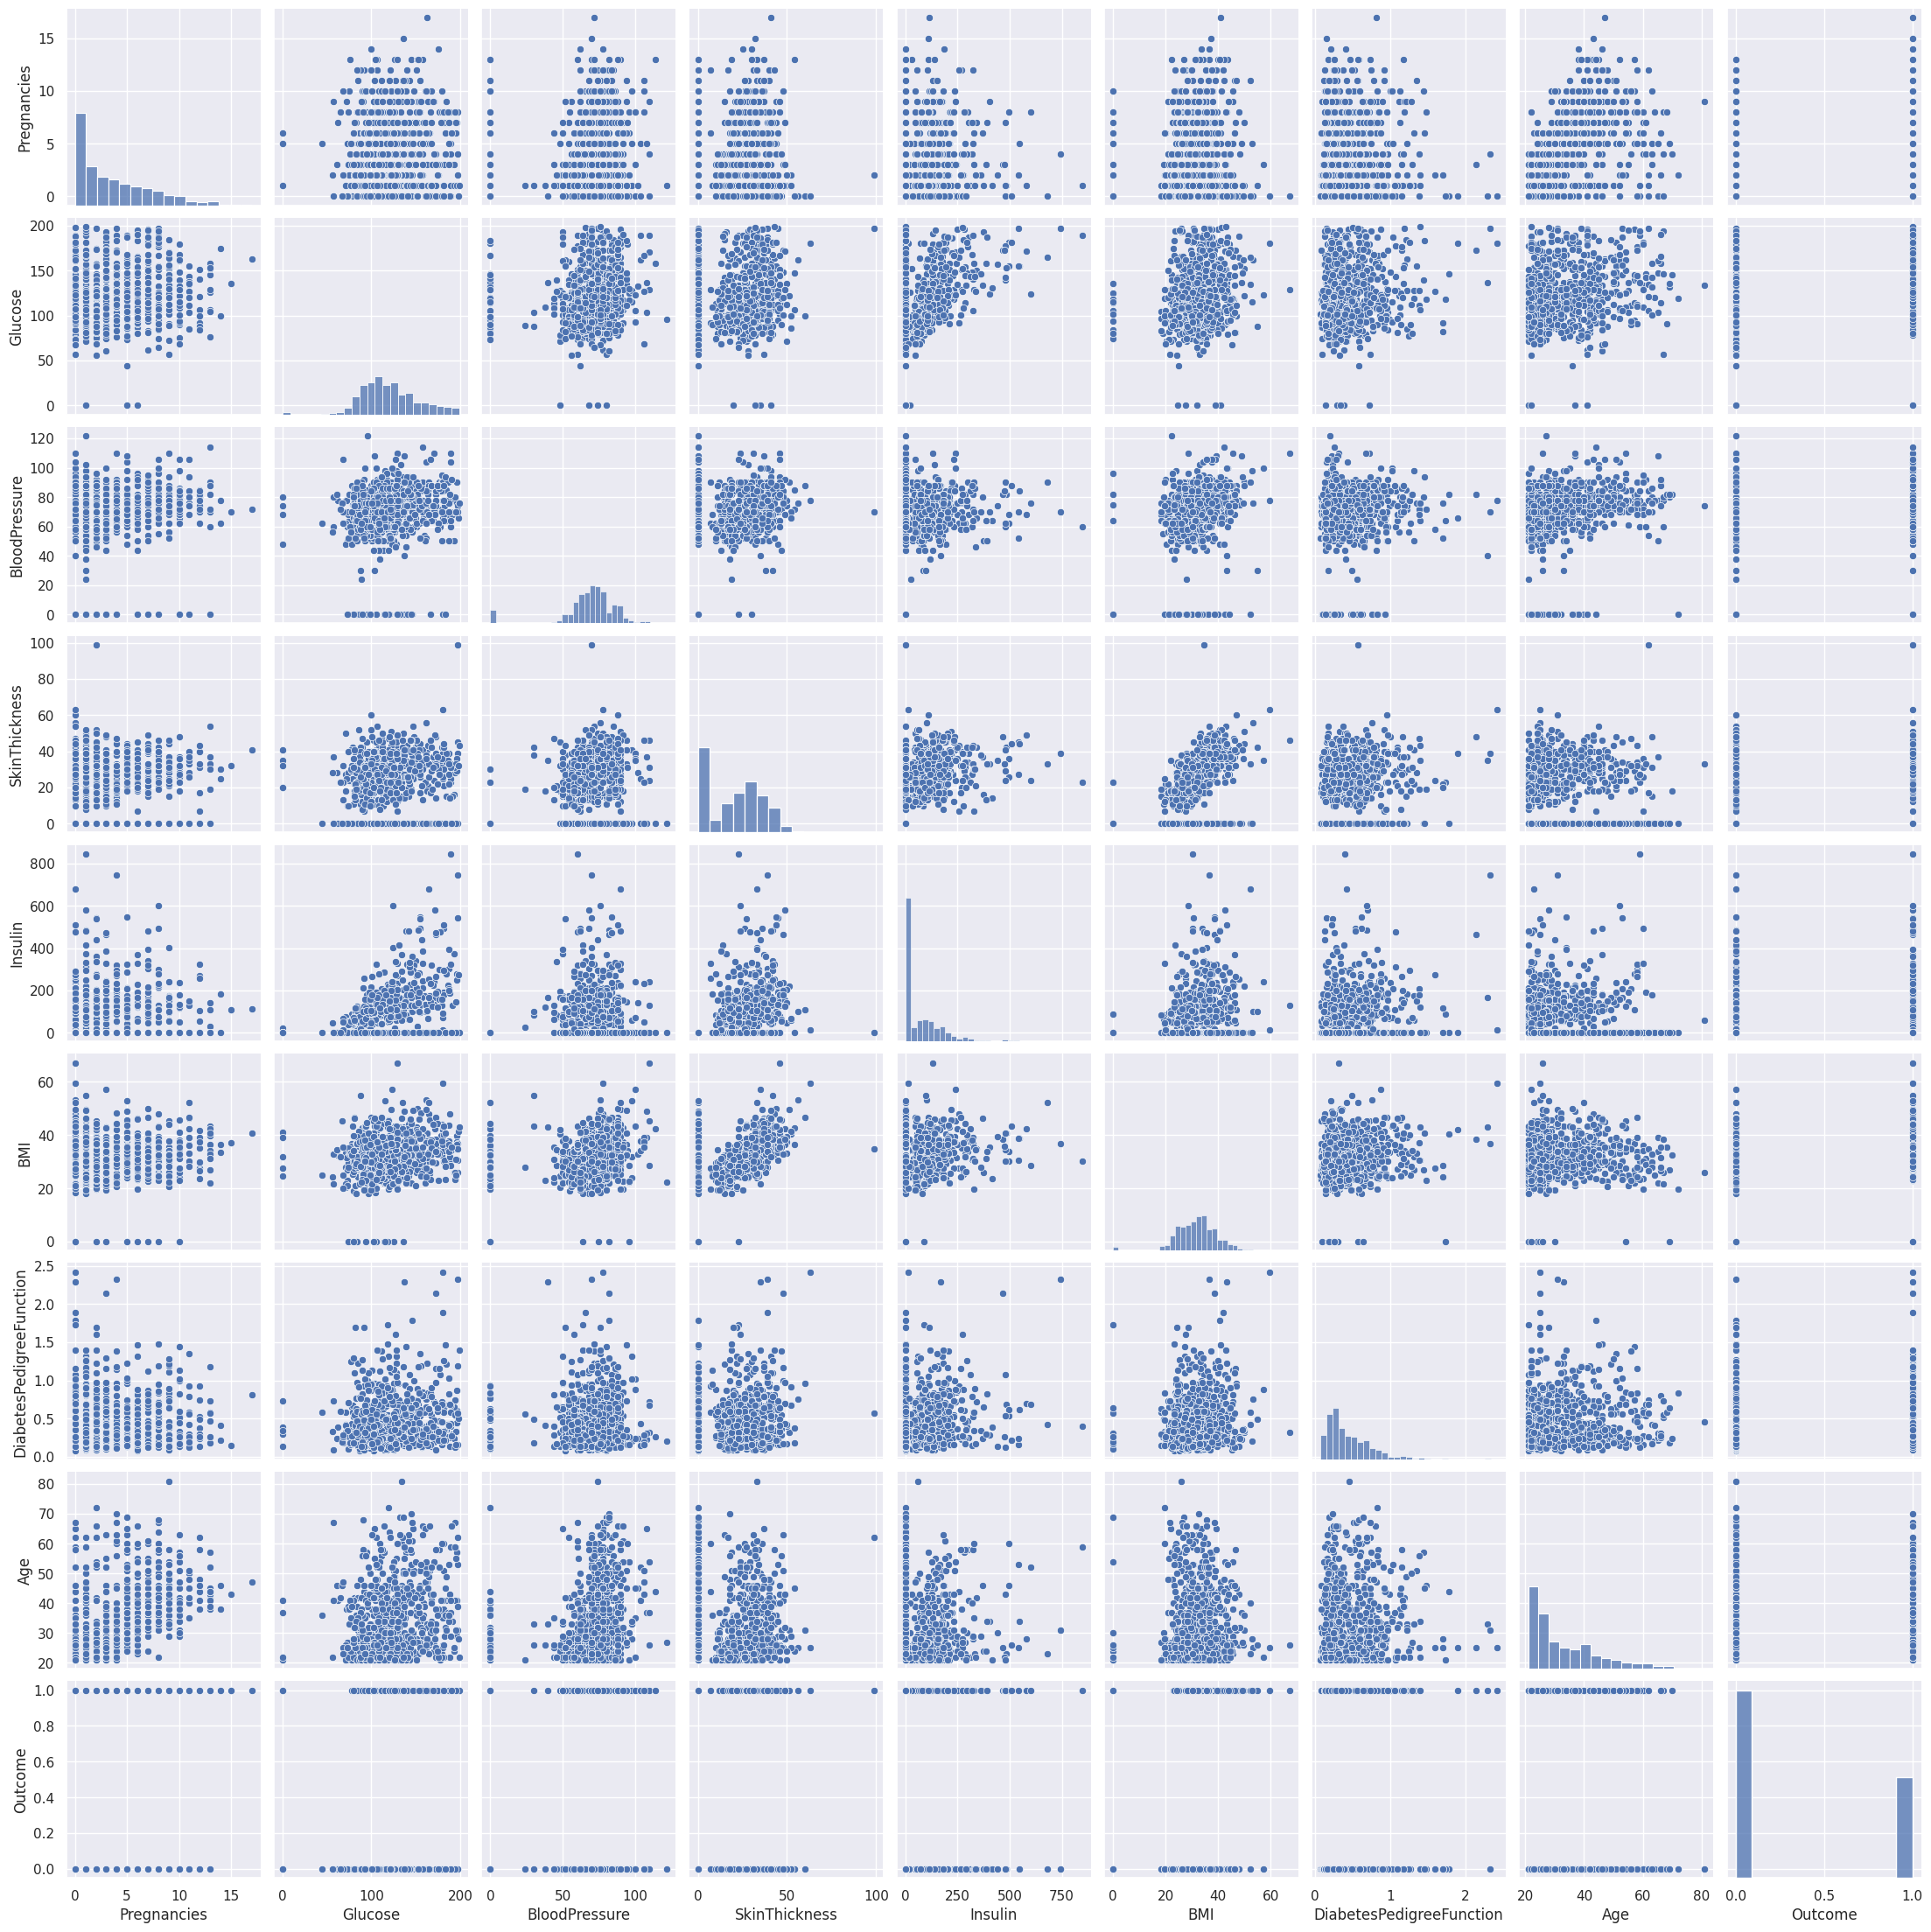

In [12]:
sns.pairplot(df)
plt.show()

Prepare to ML

In [13]:
X=df.drop("Outcome", axis=1).values
y=df["Outcome"]


In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=scaler.fit_transform(X)

Machine Leraning

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test=train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Choose model

KNeighborsClassifier(n_neighbors=10)

Prediction

In [17]:
y_predict=knn.predict(X_test)
y_predict


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [18]:

test_label= knn.predict(X_test)
pd.DataFrame({"Prediction": y_predict, "Real value": test_label})

,Prediction,Real value
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
149,1,1
150,0,0
151,0,0
152,0,0


Evaluating Model

In [27]:
from sklearn.metrics import accuracy_score
print("Model accuracy:", accuracy_score(test_label, y_predict))

Model accuracy: 1.0
